In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [80]:
df=pd.read_csv('Reviews.csv')

In [81]:
df2= df.copy()

In [82]:
df2= df2.head(500)

In [83]:
df2.shape


(500, 10)

In [84]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


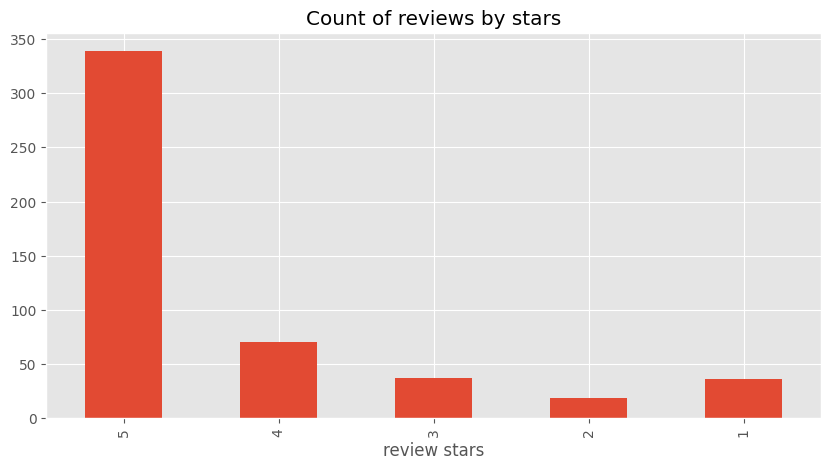

In [85]:
ax=df2.Score.value_counts().sort_index(ascending=False).plot(kind='bar',title="Count of reviews by stars",figsize=(10,5))
ax.set_xlabel("review stars")
plt.show()

In [86]:
example =df2["Text"].iloc[50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [87]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [88]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\roboc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [89]:
tagged=nltk.pos_tag(tokens)


In [90]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\roboc\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [91]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\roboc\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [92]:
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [93]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\roboc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia=SentimentIntensityAnalyzer()

In [95]:
sia.polarity_scores("I am kind of not happy")

{'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4585}

In [96]:
x=sia.polarity_scores(example)
print(x)
print(x["neg"])

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}
0.22


In [97]:
res={}
for i,row in tqdm(df2.iterrows(),total=len(df2)):
    text= row["Text"]
    myid= row["Id"]
    res[myid]=sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 2081.63it/s]


In [98]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={"index":"Id"})


In [99]:
vaders=vaders.merge(df2,how="left")

In [100]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'compound score by amazon score')

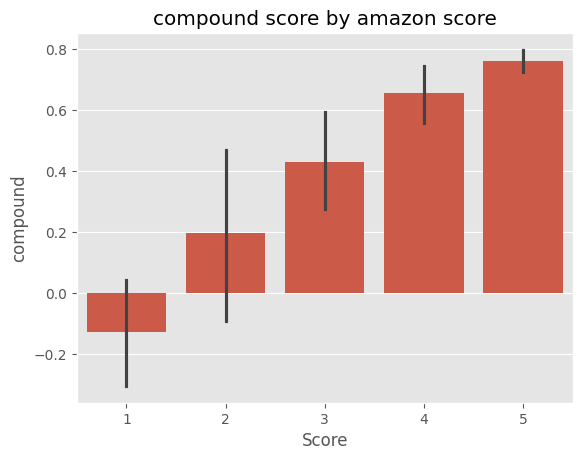

In [101]:
ax=sns.barplot(data=vaders,x="Score",y="compound")
ax.set_title("compound score by amazon score")

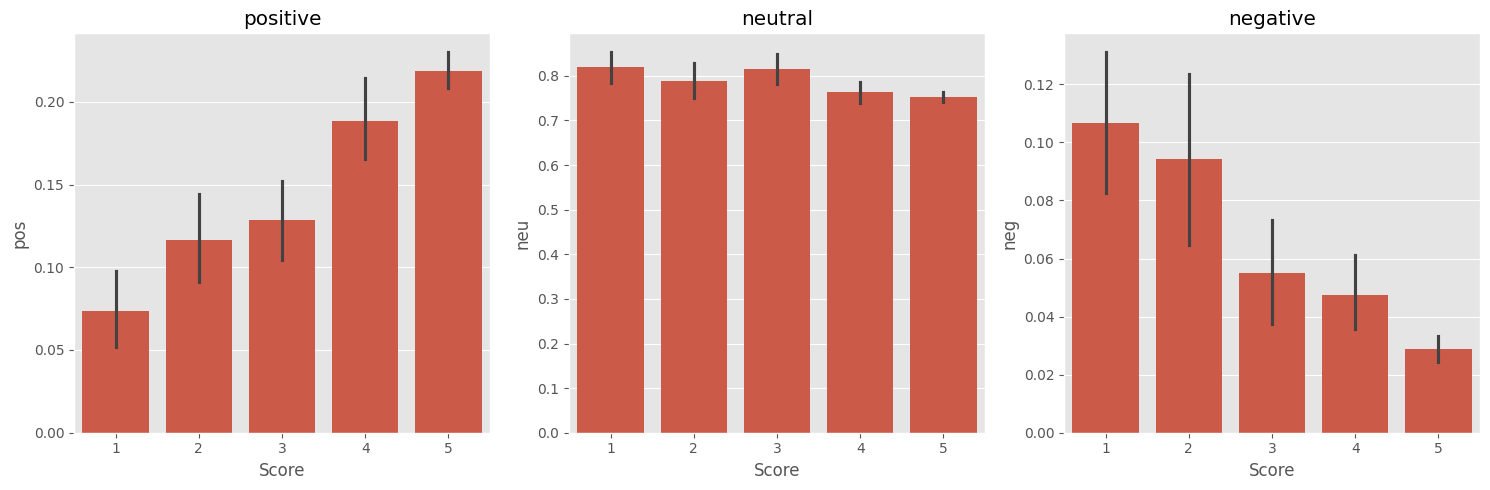

In [102]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x="Score",y="pos",ax=axs[0])
sns.barplot(data=vaders,x="Score",y="neu",ax=axs[1])
sns.barplot(data=vaders,x="Score",y="neg",ax= axs[2])
axs[0].set_title("positive")
axs[1].set_title("neutral")
axs[2].set_title("negative")
plt.tight_layout()
plt.show()

In [103]:
from transformers import  AutoTokenizer

In [104]:
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [105]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [106]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [115]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors="pt")
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        "roberta_neg":scores[0],
        "roberta_neu":scores[1],
        "roberta_pos":scores[2],
    }
    return scores_dict

In [117]:
polarity_scores_roberta(example)

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687459,
 'roberta_pos': 0.0029573692}

In [121]:
res={}
for i,row in tqdm(df2.iterrows(),total=len(df2)):
    try:
        text= row["Text"]
        myid= row["Id"]
        vader_result=sia.polarity_scores(text)

        roberta_result= polarity_scores_roberta(text)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
        both={**vader_result,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f"broke for id {myid}")

 17%|█▋        | 84/500 [00:13<00:47,  8.76it/s]

broke for id 83


 38%|███▊      | 188/500 [00:30<00:36,  8.58it/s]

broke for id 187


100%|██████████| 500/500 [01:29<00:00,  5.62it/s]


In [122]:
result_df=pd.DataFrame(res).T
result_df=result_df.reset_index().rename(columns={"index":"Id"})
result_df=result_df.merge(df2,how="left")

In [123]:
result_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [124]:
result_df.head().columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

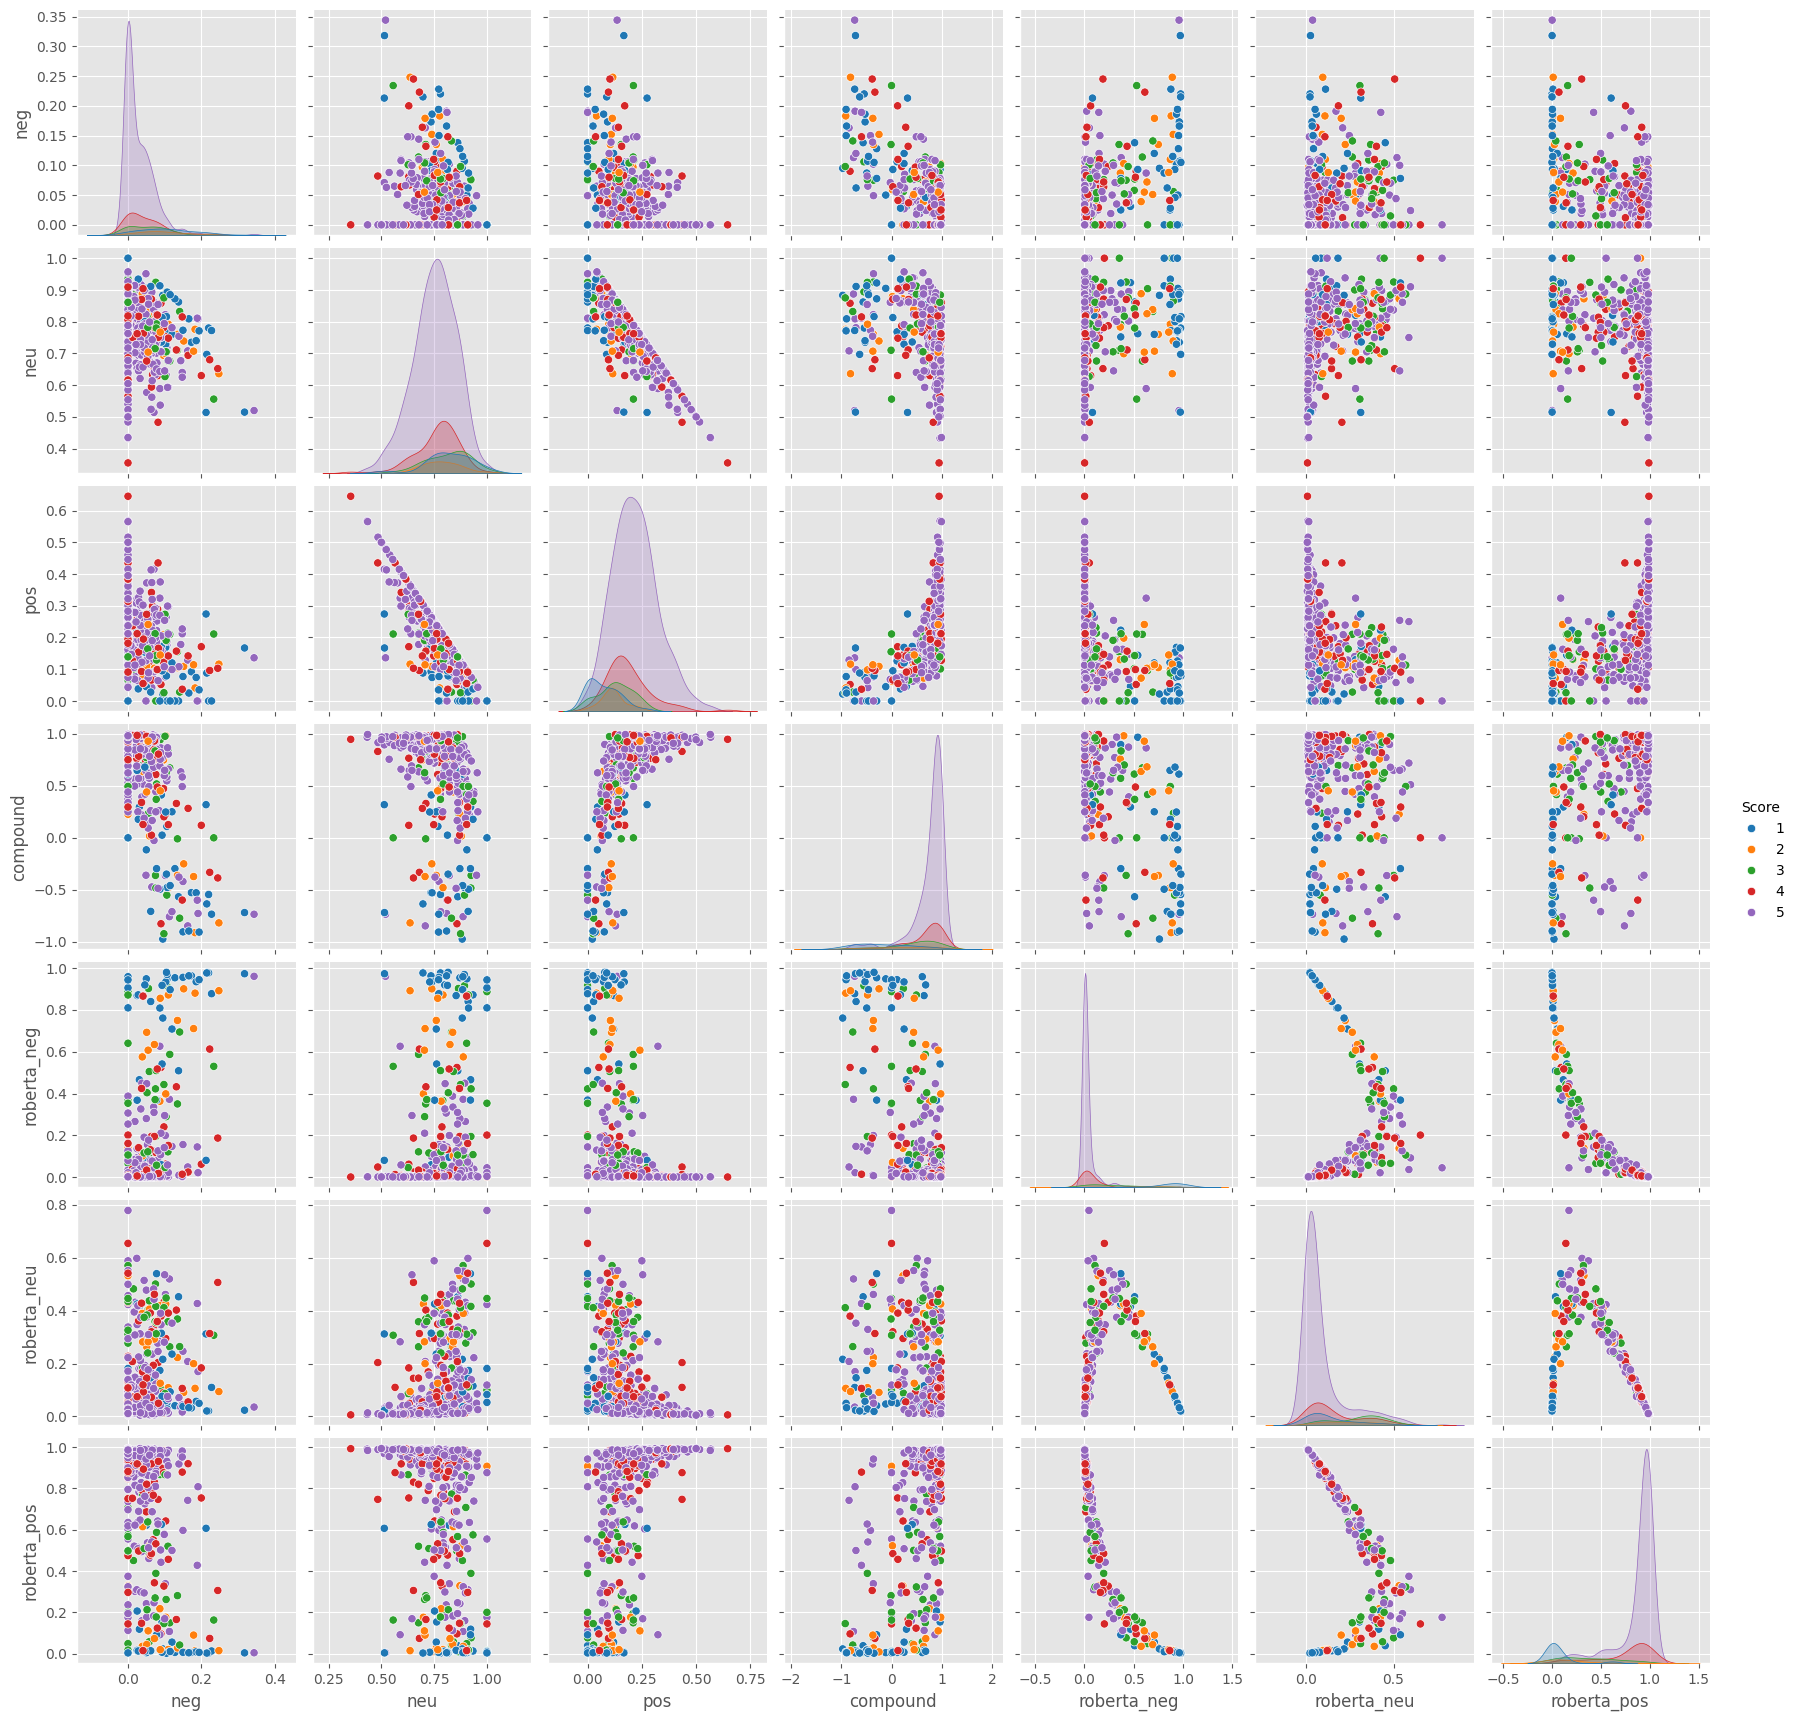

In [125]:
sns.pairplot(data=result_df,vars=['neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],hue="Score",palette="tab10")
plt.show()